# Regression Modeling in R

### Exercise 1

The formula for a line is usually written as
$$y = b+mx$$

This defines the relationship between $x$ and $y$, by multiplying $x$ by the slope $m$ and adding the intercept $b$.

Since we can call the slope and intercept anything we want, we'll use the notation found in your book,
$$y = \alpha + \beta x$$

**Part A**: There is nothing random in the equation above. Write a function that plots this equation for $\alpha=0.5$ and $\beta=1$, on the domain $x \in [0,5]$.

 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
[20] 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7
[39] 3.8 3.9 4.0 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.0


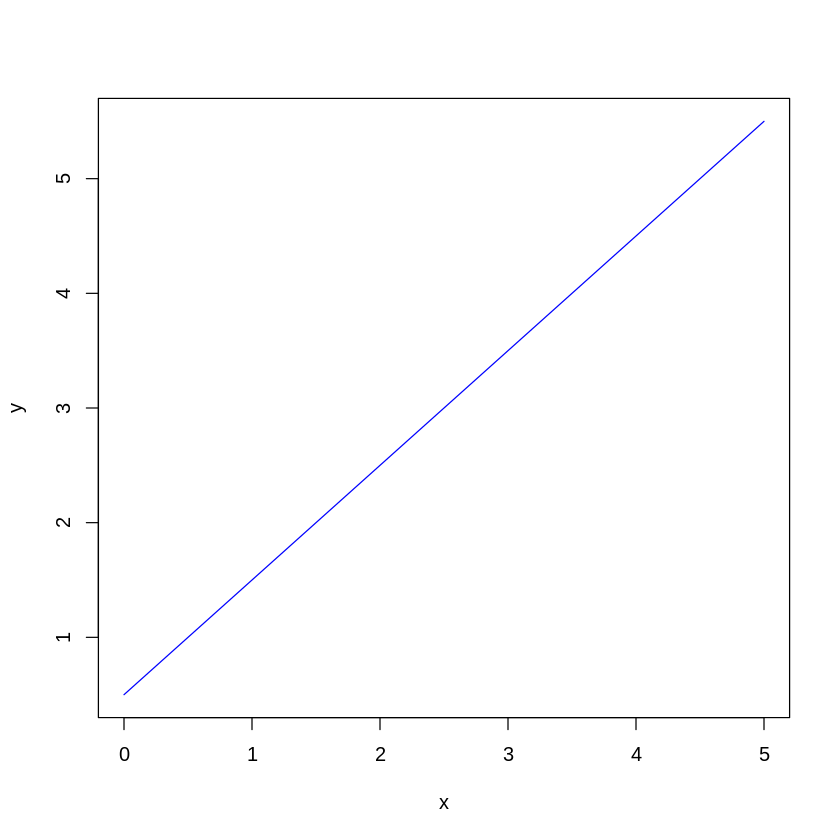

In [ ]:
alpha <- 0.5
beta <- 1

x <- seq(0, 5, 0.1)
y <- alpha + beta*x
plot(x,y,type='l',col='blue')
print(x)

**Part B**: We have, in many courses in past years, called $x$ the independent variable and $y$ the dependent variable. Here, we'll introduce some new words: We will sometimes call $x$ the predictor or the explanatory variable. In machine learning, the vocabulary word that you may hear is that $x$ is a feature.

On the other hand $y$, the dependent variable, may be called the response variable.

Normally, when we plot lines, for a given independent variable $x$, there is a fixed $y$. But in real-world scenarios, we don't just get $y$ back. We often get $y$ back with _noise_.

Write a function that takes in values of $x$, $num points$, $\alpha$, $\beta$, and variance $\sigma^2$, and returns
$$ y = \alpha + \beta x + \epsilon$$
where $\epsilon$ is drawn from a Normal distribution with mean of $0$ and variance of $\sigma^2$.

In [ ]:
y_noisy <- function(x, alpha, beta, variance){

  noise = rnorm(25, mean = 0, sd = sqrt(variance))
  return (alpha + beta*x + noise)
}

plot_noisy_line <- function(var=1, alpha=0.5, beta=2, n_points=25){
  x <- seq(0,5, len=n_points)
  y <- y_noisy(x, alpha, beta, var)

  plot(x, y, col="red")
}

**Part C**: Use your function from Part B to make a plot of this noise-added data, for $x \in [0,5]$, with 25 evenly spaced values. On top of these noisy values, plot the noise-free values, like you did in Part A. Looking ahead, it will be nice if you can easily change the slope, intercept, number of points, and noise levels for this plot, so please write a function that allows you to, for now, plot with the parameters discussed so far.

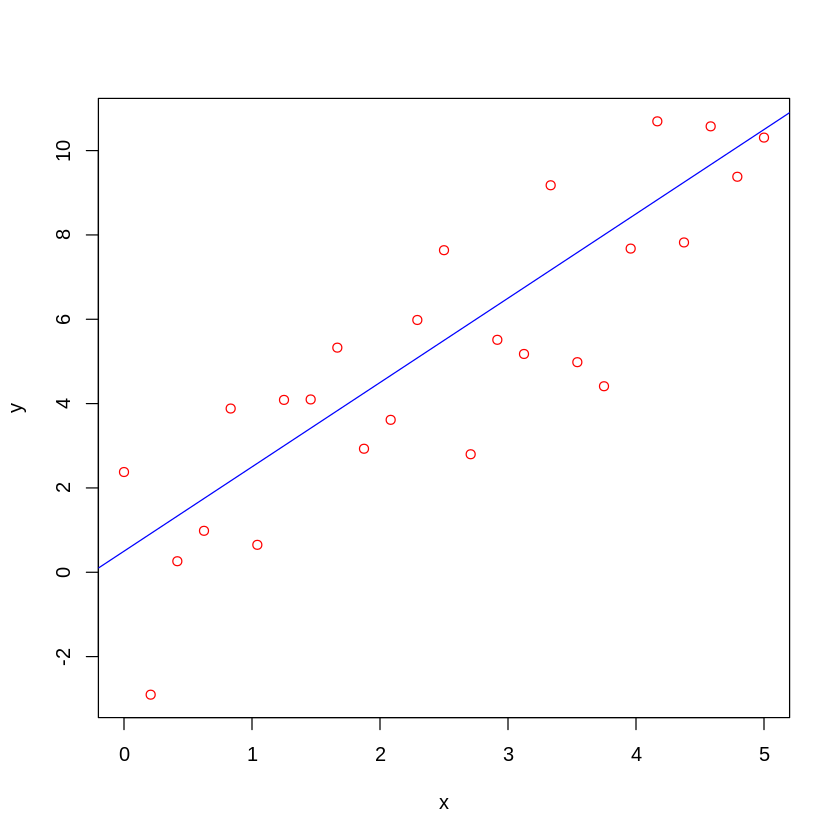

In [ ]:
alpha=0.5
beta=2
plot_noisy_line(var=2)
abline(alpha, beta, col="blue")

**Part D**: Slowly increase the value of the variance of the noise, and create a few more plots. Comment on what you notice.

## Exercise 2: Repeat-o-fit

**Part A**: Code up a function that takes in sets of matched x and y values and returns the linear regression parameters $\hat{\alpha}$ and $\hat{\beta}$.

In [ ]:
regression <- function(x, y){
  xbar = mean(x)
  ybar = mean(y)

  numerator = 0
  denominator = 0

  for(i in length(x)){
    shiftx = x[i]-xbar
    shifty = y[i]-ybar

    numerator = numerator + shiftx*shifty
    denominator = denominator + shiftx*shiftx

    beta_hat = numerator/denominator
    alpha_hat = ybar - beta_hat*xbar

    return_list = list("alpha_hat"=alpha_hat, "beta_hat"=beta_hat)

    return (return_list)
  }
}

**Part B**: Using your functions from Exercise 1, consider 10 equally-spaced values of x between 0 and 5, and add noise to a line with slope 2 and intercept 0.5.  Let the variance of the noise be 2.

Then, fit the points using your function from Part A. On the same axes, create a plot of
- the noisy points
- your best fit line
- the original line

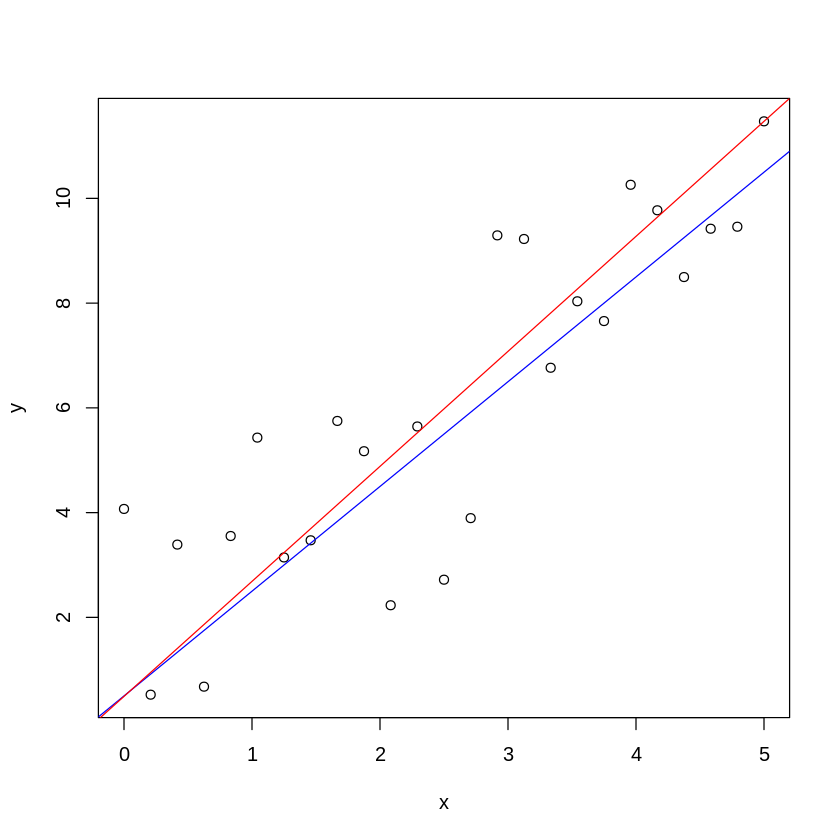

In [ ]:
# generate our noisy data
x = seq(0, 5, len=25)
y = y_noisy(x, 0.5, 2, var=2)

alpha = 0.5
beta = 2

# use our function to find alpha_hat and beta_hat
return_values = regression(x, y)
alpha_hat = return_values$alpha_hat
beta_hat = return_values$beta_hat

plot(x, y)
abline(alpha, beta, col="blue")
abline(alpha_hat, beta_hat, col="red")

**Part C** Repeatedly redraw your plot from Part B and note the accuracies of the slope and intercept estimates. Experiment with changing the number of points, previously set to 10. Experiment with changing the variance of the noise. What do you notice?